In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS526/Project/WHO_Suicide_MissingHDIFixed.csv')
df=df.iloc[:,1:]
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,MissingHDI
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.619,"2,156,624,900",796,Generation X,0.0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.619,"2,156,624,900",796,Silent,0.0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.619,"2,156,624,900",796,Generation X,0.0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.619,"2,156,624,900",796,G.I. Generation,0.0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.619,"2,156,624,900",796,Boomers,0.0


In [ ]:
hdi = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CS526/Project/hdr-data(ALL HDI DATA).xlsx')
hdi = hdi[['country', 'indicator', 'year', 'value']]
hdi = hdi.pivot(index=['country', 'year'], columns='indicator', values='value')
hdi.reset_index(inplace=True)
hdi.head()

indicator,country,year,Expected Years of Schooling (years),Gross National Income Per Capita (2017 PPP$),HDI Rank,Human Development Index (value),Life Expectancy at Birth (years),Mean Years of Schooling (years)
0,Afghanistan,1990,2.936,3115.670,NaN,0.284,45.967,0.872
1,Afghanistan,1991,3.228,2817.305,NaN,0.292,46.663,0.915
2,Afghanistan,1992,3.520,2474.682,NaN,0.299,47.596,0.959
3,Afghanistan,1993,3.812,1723.020,NaN,0.307,51.466,1.002
4,Afghanistan,1994,4.104,1202.010,NaN,0.300,51.495,1.045


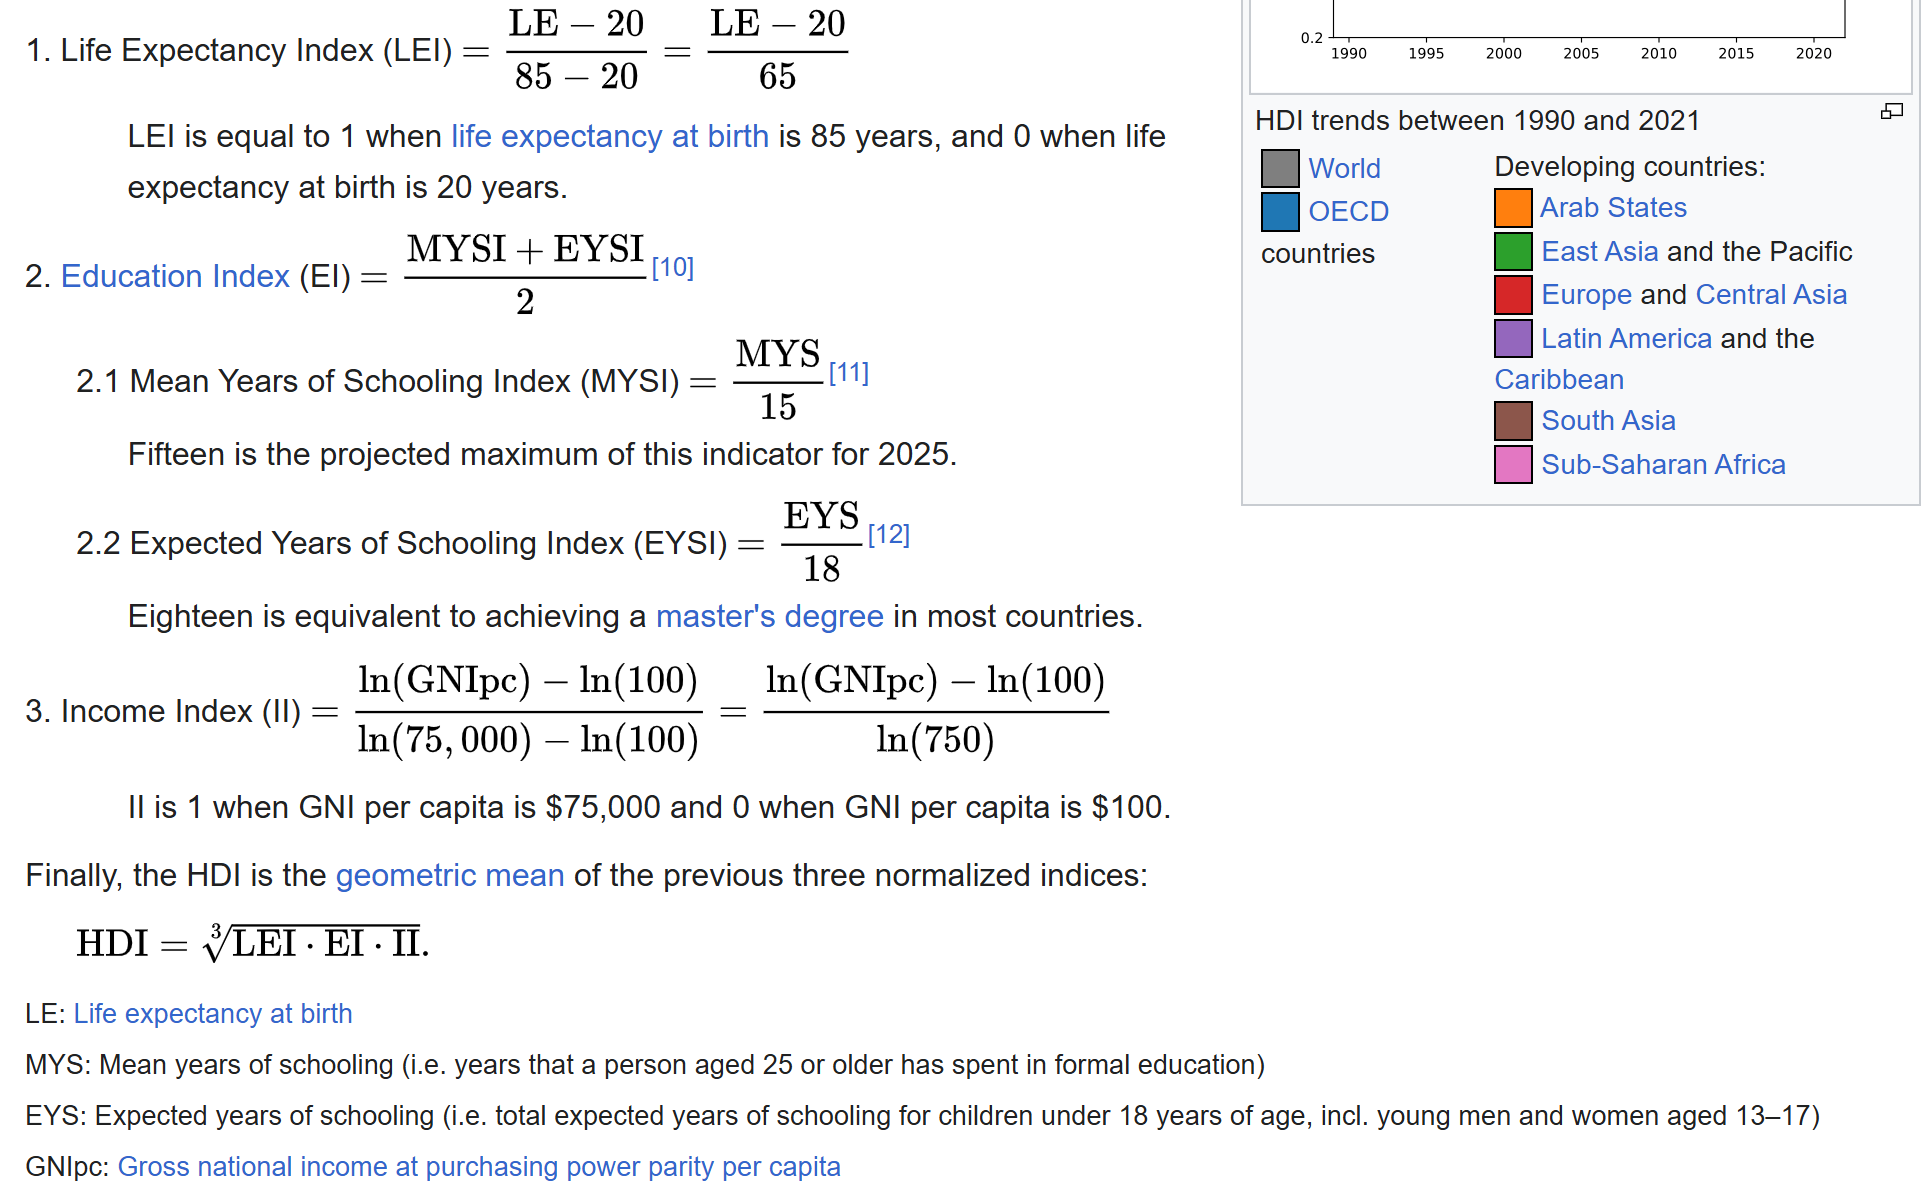

In [ ]:
combined = pd.merge(df, hdi, how='left', on=['country', 'year'])
combined = combined[~combined['Human Development Index (value)'].isna()]
combined = combined.drop(columns=['HDI Rank', 'HDI for year'])
df = combined.rename(columns={'Human Development Index (value)':'HDI for year'})

In [ ]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '').astype(int)
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),MissingHDI,Expected Years of Schooling (years),Gross National Income Per Capita (2017 PPP$),HDI for year,Life Expectancy at Birth (years),Mean Years of Schooling (years)
count,22254.000000,22254.000000,2.225400e+04,22254.000000,2.225400e+04,22254.000000,22254.000000,22254.000000,22254.000000,22254.000000,22254.000000,22254.000000
mean,2003.366406,259.232003,1.976886e+06,13.025792,5.087445e+11,18838.103262,0.017705,14.093269,26344.267701,0.779788,74.648326,9.695752
std,7.179283,964.998407,4.106600e+06,18.932443,1.590549e+12,20234.331879,0.131879,2.387329,19384.388608,0.096155,4.939880,2.262601
min,1990.000000,0.000000,2.780000e+02,0.000000,6.310127e+07,251.000000,0.000000,6.900000,1822.276000,0.490000,53.980000,3.193000
25%,1998.000000,3.000000,1.279115e+05,1.130000,1.205920e+10,3929.000000,0.000000,12.269000,11147.519000,0.706000,71.189000,8.028000
50%,2004.000000,29.000000,4.824225e+05,6.130000,5.769045e+10,10982.000000,0.000000,14.025000,20435.940000,0.784000,75.359000,10.045000
75%,2009.000000,140.000000,1.630098e+06,16.747500,2.928590e+11,28429.000000,0.000000,15.804000,38470.613000,0.863000,78.425000,11.416000
max,2016.000000,22338.000000,4.380521e+07,204.920000,1.812071e+13,126352.000000,1.000000,23.248000,109543.075000,0.952000,83.893000,14.082000


In [ ]:
# One-hot encoding for categorical variables
label_encoder = LabelEncoder()
df['country_onehot'] = label_encoder.fit_transform(df['country'])
df['sex_onehot'] = label_encoder.fit_transform(df['sex'])
df['generation_onehot'] = label_encoder.fit_transform(df['generation'])

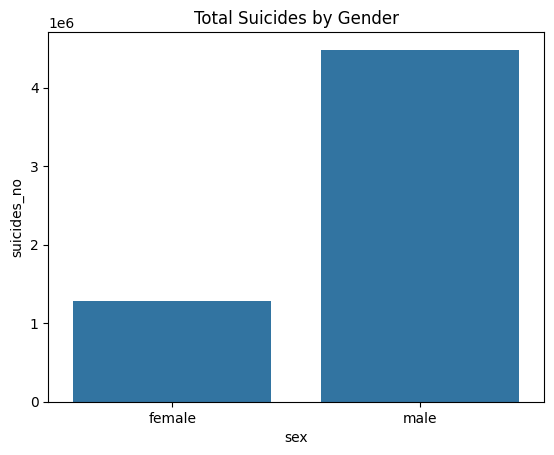

In [ ]:
df_gender = df.groupby('sex')['suicides_no'].sum().reset_index()
sns.barplot(x='sex', y='suicides_no', data=df_gender)
plt.title('Total Suicides by Gender')
plt.show()

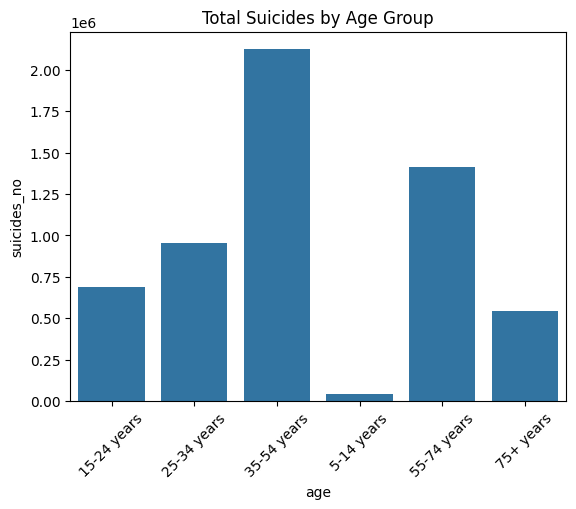

In [ ]:
df_age = df.groupby('age')['suicides_no'].sum().reset_index()
sns.barplot(x='age', y='suicides_no', data=df_age)
plt.title('Total Suicides by Age Group')
plt.xticks(rotation=45)
plt.show()

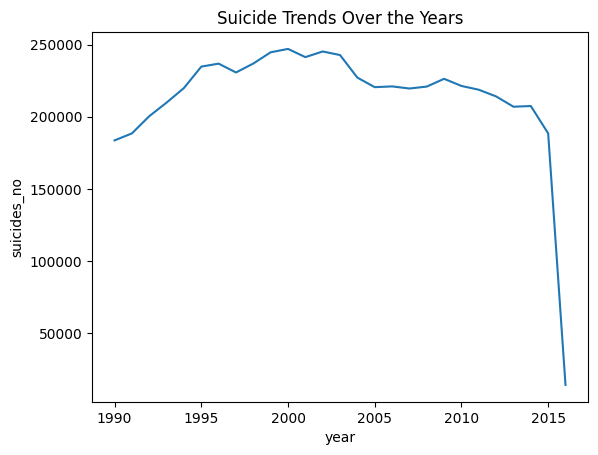

In [ ]:
df_year = df.groupby('year')['suicides_no'].sum().reset_index()
sns.lineplot(x='year', y='suicides_no', data=df_year)
plt.title('Suicide Trends Over the Years')
plt.show()

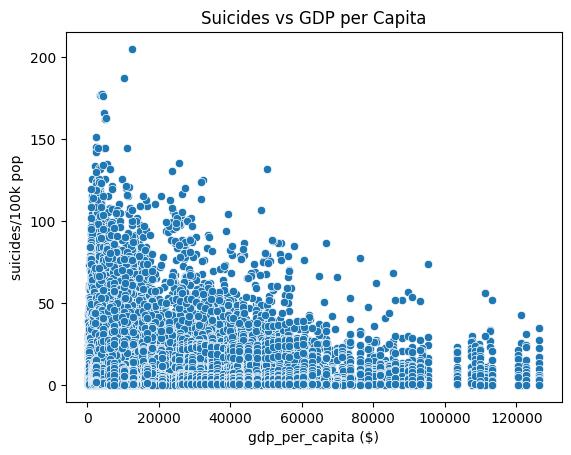

In [ ]:
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df)
plt.title('Suicides vs GDP per Capita')
plt.show()

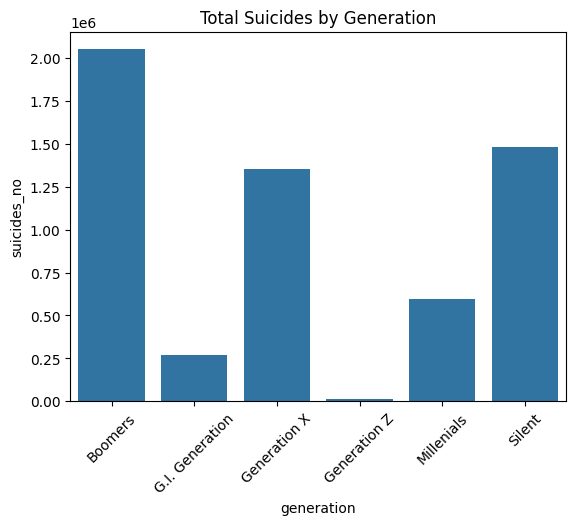

In [ ]:
df_generation = df.groupby('generation')['suicides_no'].sum().reset_index()
sns.barplot(x='generation', y='suicides_no', data=df_generation)
plt.title('Total Suicides by Generation')
plt.xticks(rotation=45)
plt.show()

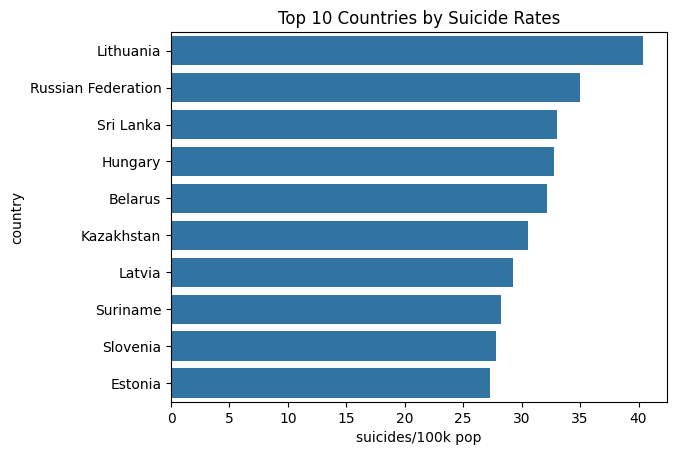

In [ ]:
df_country = df.groupby('country')['suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop', ascending=False)
top_10_countries = df_country.head(10)
sns.barplot(x='suicides/100k pop', y='country', data=top_10_countries)
plt.title('Top 10 Countries by Suicide Rates')
plt.show()

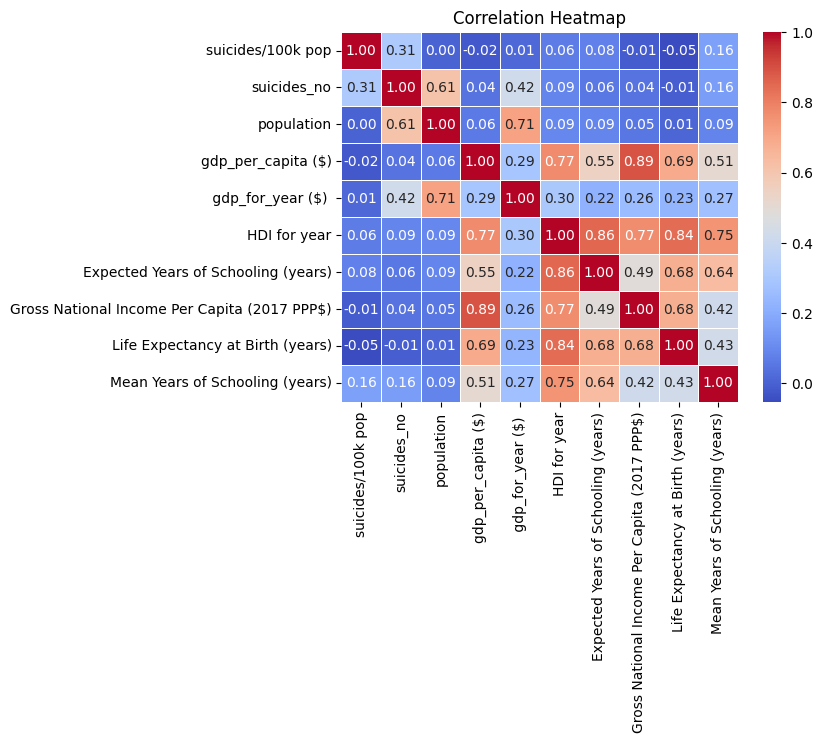

In [ ]:
corr = df[['suicides/100k pop','suicides_no', 'population', 'gdp_per_capita ($)', ' gdp_for_year ($) ', 'HDI for year', 'Expected Years of Schooling (years)',
       'Gross National Income Per Capita (2017 PPP$)', 'Life Expectancy at Birth (years)',
       'Mean Years of Schooling (years)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Regression Tree 1

In [ ]:
X = df[['year', 'sex_onehot',  'population', ' gdp_for_year ($) ', 'HDI for year', 'generation_onehot']]  # Feature
y = df['suicides_no']      # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 142025.85126937766
R-squared: 0.8532005399976746


              Feature  Importance
2          population    0.471112
5   generation_onehot    0.145974
1          sex_onehot    0.143038
3   gdp_for_year ($)     0.127476
4        HDI for year    0.090181
0                year    0.022219


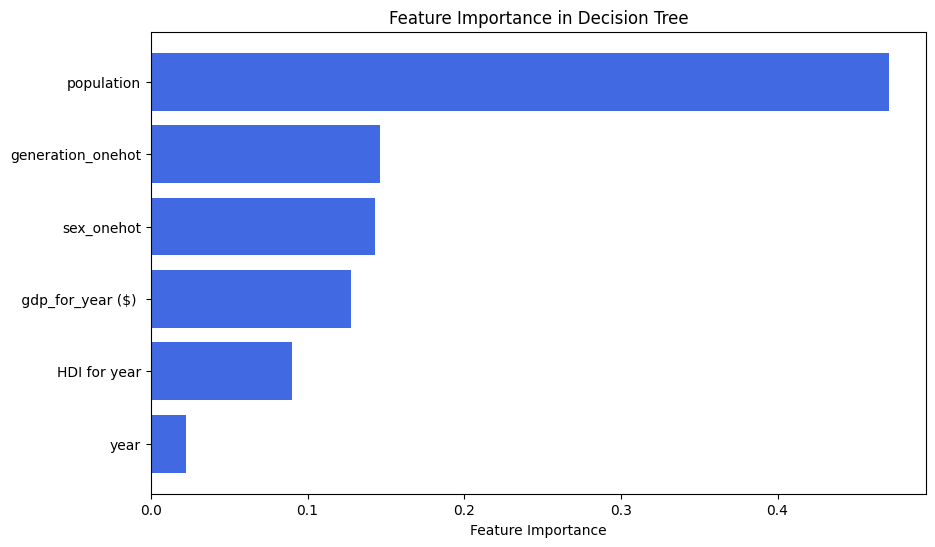

In [ ]:
# Get the feature importance values
feature_importance = tree_regressor.feature_importances_

# Create a DataFrame for a better display of feature importances
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance and display
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # To show most important at the top
plt.show()

## Regression Tree 2

In [ ]:
# Normalized Model
X = df[['year', 'sex_onehot', 'population', 'gdp_per_capita ($)', 'HDI for year', 'generation_onehot']]  # Features
y = df['suicides/100k pop']      # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 150.7810889463042
R-squared: 0.5856586912096882


              Feature  Importance
2          population    0.273291
5   generation_onehot    0.177340
1          sex_onehot    0.161357
3  gdp_per_capita ($)    0.149258
4        HDI for year    0.148821
0                year    0.089933


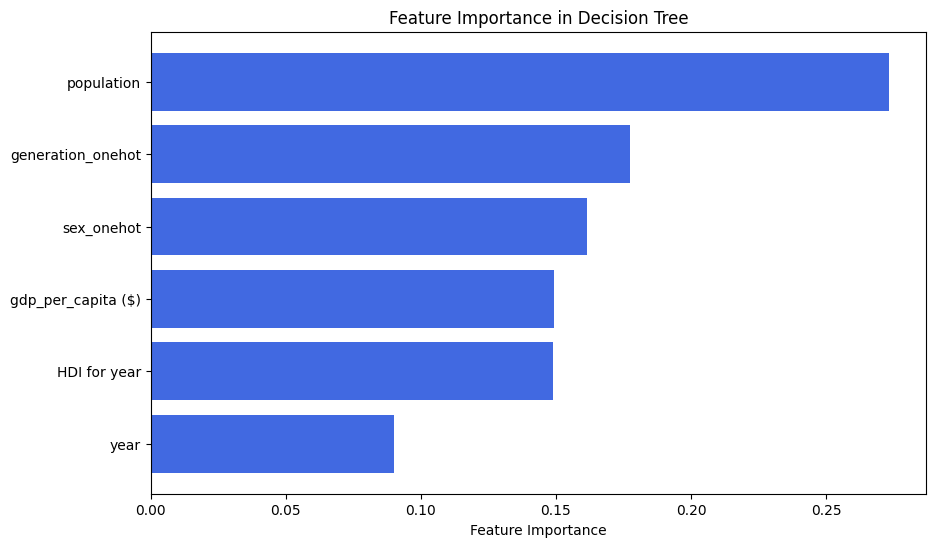

In [ ]:
# Get the feature importance values
feature_importance = tree_regressor.feature_importances_

# Create a DataFrame for a better display of feature importances
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance and display
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # To show most important at the top
plt.show()

## Random Forest 1

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

X = df[['year', 'sex_onehot',  'population', ' gdp_for_year ($) ', 'HDI for year', 'generation_onehot']]  # Feature
y = df['suicides_no']      # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 41024.237467280764
R-squared: 0.9575969032864198


              Feature  Importance
2          population    0.464886
3   gdp_for_year ($)     0.155418
1          sex_onehot    0.144626
5   generation_onehot    0.110322
4        HDI for year    0.098908
0                year    0.025841


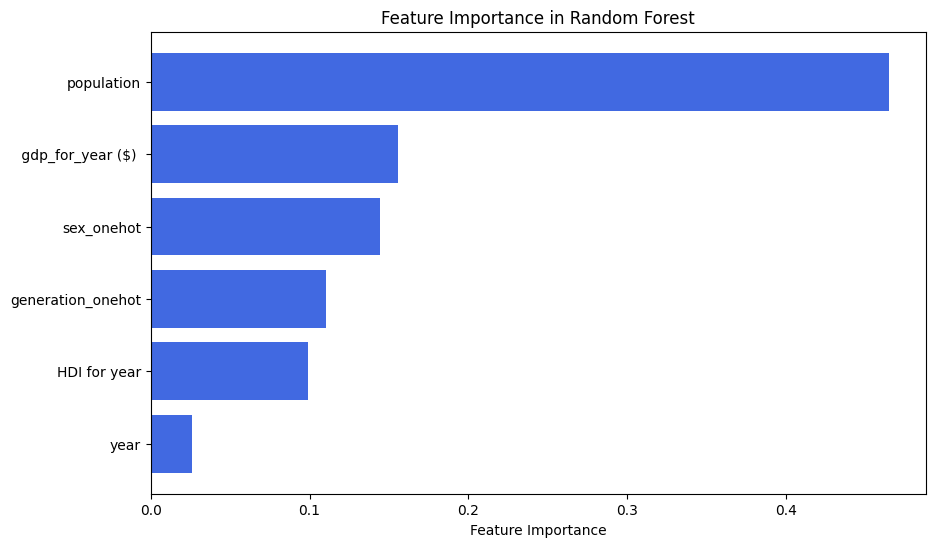

In [ ]:
# Get the feature importance values
feature_importance = rf_regressor.feature_importances_

# Create a DataFrame for a better display of feature importances
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance and display
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To show most important at the top
plt.show()

## Random Forest 2

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Normalized Model
X = df[['year', 'sex_onehot', 'population', 'gdp_per_capita ($)', 'HDI for year', 'generation_onehot']]  # Features
y = df['suicides/100k pop']      # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 77.3627469353159
R-squared: 0.7874098002554706


              Feature  Importance
2          population    0.261515
5   generation_onehot    0.177643
1          sex_onehot    0.161430
4        HDI for year    0.160986
3  gdp_per_capita ($)    0.152835
0                year    0.085592


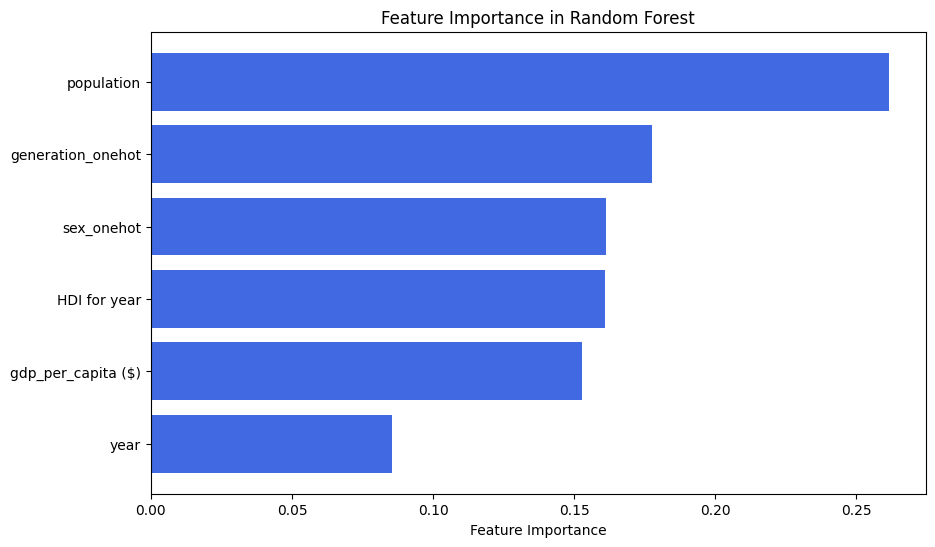

In [ ]:
# Get the feature importance values
feature_importance = rf_regressor.feature_importances_

# Create a DataFrame for a better display of feature importances
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance and display
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To show most important at the top
plt.show()

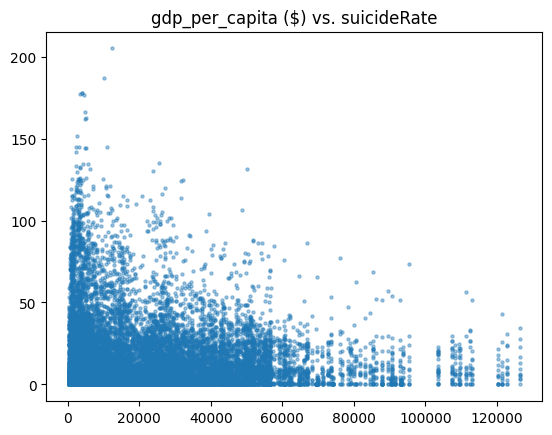

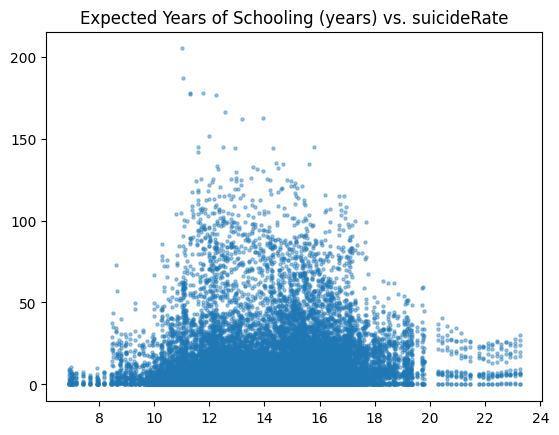

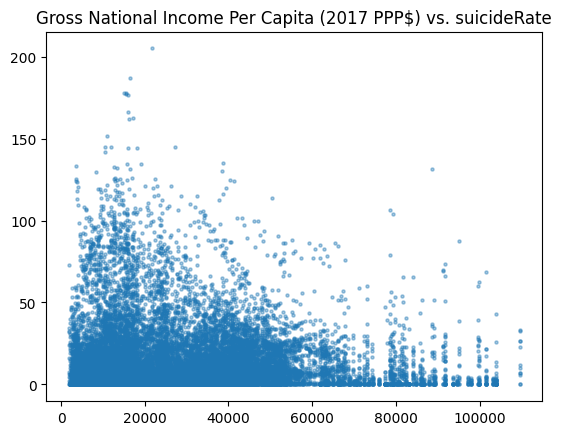

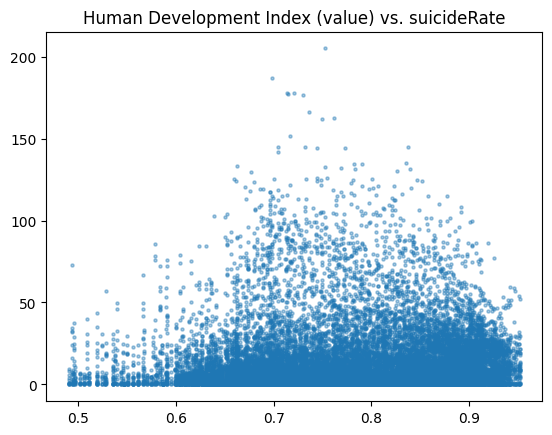

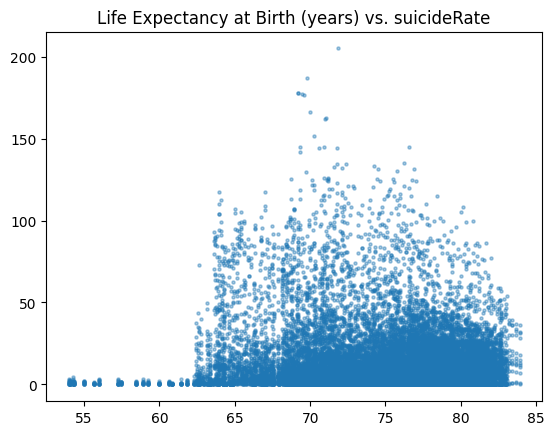

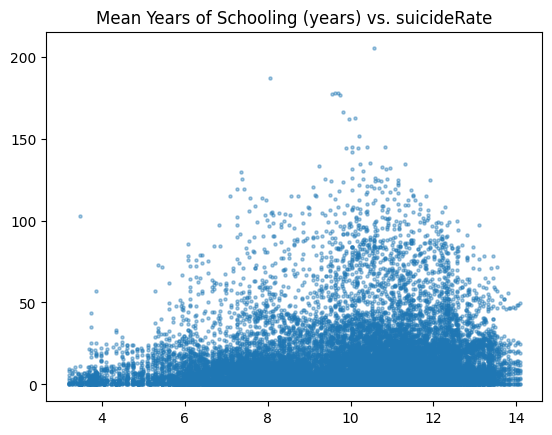

In [ ]:
for key in ['gdp_per_capita ($)','Expected Years of Schooling (years)',
       'Gross National Income Per Capita (2017 PPP$)',
       'Human Development Index (value)', 'Life Expectancy at Birth (years)',
       'Mean Years of Schooling (years)']:

    y = combined['suicides/100k pop']
    X = combined[key]
    if key == 'HDI for year':
        val_filter = X!=0
        X = X[val_filter]
        y = y[val_filter]
    plt.scatter(X,y,s = 5,alpha = .4)
    plt.title(f'{key} vs. suicideRate')
    plt.show()

In [ ]:
%%shell
# get path of current notebook
jupyter nbconvert --to html /content/Project.ipynb

[NbConvertApp] Converting notebook /content/Project.ipynb to html
[NbConvertApp] Writing 1171028 bytes to /content/Project.html
